In [22]:
import numpy as np

In [24]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [30]:
from tensorflow.keras.optimizers import SGD

In [32]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
import random

In [38]:
# b. Load and Preprocess Data (MNIST dataset)
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
print("Train set shape:", X_train.shape)   # (60000, 28, 28)
print("Test set shape:", X_test.shape)     # (10000, 28, 28)

Train set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [44]:
# Normalize values to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [46]:
# Reshape to (n_samples, 28, 28, 1) for CNN
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [48]:
print("Reshaped train set:", X_train.shape)  # (60000, 28, 28, 1)

Reshaped train set: (60000, 28, 28, 1)


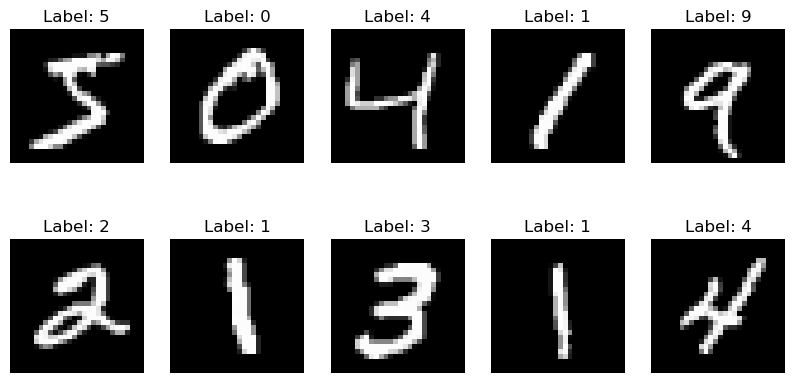

In [50]:
# Plot sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [52]:
# c. Define CNN Model Architecture (modified / deeper version)
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),  # conv layer 1
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu"),  # conv layer 2
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),          # fully connected layer
    Dense(10, activation="softmax")         # output layer
])

In [53]:
# Compile model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# d. Train Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/10
1875/1875 - 36s - 19ms/step - accuracy: 0.9420 - loss: 0.1840 - val_accuracy: 0.9808 - val_loss: 0.0564
Epoch 2/10
1875/1875 - 33s - 18ms/step - accuracy: 0.9834 - loss: 0.0539 - val_accuracy: 0.9886 - val_loss: 0.0387
Epoch 3/10
1875/1875 - 33s - 18ms/step - accuracy: 0.9888 - loss: 0.0359 - val_accuracy: 0.9893 - val_loss: 0.0320
Epoch 4/10
1875/1875 - 32s - 17ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9903 - val_loss: 0.0296
Epoch 5/10
1875/1875 - 33s - 17ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9913 - val_loss: 0.0262
Epoch 6/10
1875/1875 - 32s - 17ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9919 - val_loss: 0.0254
Epoch 7/10
1875/1875 - 32s - 17ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9915 - val_loss: 0.0270
Epoch 8/10
1875/1875 - 32s - 17ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9905 - val_loss: 0.0271
Epoch 9/10
1875/1875 - 34s - 18ms/step - accuracy: 0.9975 - loss: 0.0081 - val_a

In [55]:
# e. Evaluate Model
score = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Loss:", score[0])
print("Test Accuracy:", score[1])


Test Loss: 0.030007336288690567
Test Accuracy: 0.9911999702453613


In [56]:
# Predictions on test set
predictions = np.argmax(model.predict(X_test), axis=-1)
print("Sklearn Accuracy:", accuracy_score(y_test, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Sklearn Accuracy: 0.9912


In [57]:
# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation Accuracy')

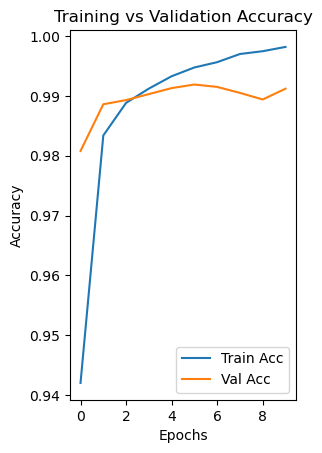

In [58]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()
plt.title("Training vs Validation Accuracy")

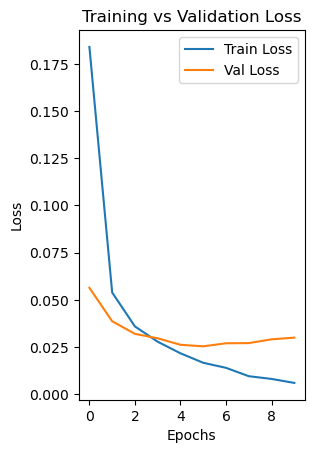

In [59]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()
plt.title("Training vs Validation Loss")

plt.show()